# Introducció a la pràctica 2

## Objectius

Els objectius d'aquesta pràctica són:
  
* Aplicar models de classificació, ficant l'èmfasi en:
    1. Aplicar diferents classificadors (regressor logístic i svm) i entendre les millores d'aplicar kernels.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant


* Ésser capaç d'aplicar tècniques de classificació en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Bases de dades

Cada grup utilitzarà les bases de dades que se li hagin assignat depenent del grup on s'ha apuntat al caronte. 


| # | GRUP | BASE DE DADES ASSIGNADA|
|:-:|:-:|:--|
|	1	|	GA\*01-0000	| https://www.kaggle.com/rounakbanik/pokemon	|
|	2	|	GA\*02-0000	| https://www.kaggle.com/c/titanic/data	|
|	3	|	GA\*03-0000	| https://www.kaggle.com/jsphyg/weather-dataset-rattle-package	|
|	4	|	GA\*04-0000	|https://www.kaggle.com/iabhishekofficial/mobile-price-classification	|





## Avaluació i entregues de la pràctica 2

En la pràctica 2, es presenten diversos problemes per comprendre els mètodes de classificació numèrica.

Les entregues s'organitzen en dos nivells d'assoliment dels objectius, incrementals: apartat **B, (sobre 6 punts)**, assoliment baix; apartat **A, (sobre 4 punts)**, assoliment alt. La suma dels 2 apartats serà la nota final de la pràctica 2. Per a realitzar el apartat A, prèviament s'ha d'haver resolt l'apartat B.

Per cada apartat s'utilitzarà una base de dades diferent. A l'apartat B, treballarem majoritariament amb dades numèriques i es farà servir per establir les bases i l'esquelet per l'apartat A, on hi trobarem unes dades molt més riques i complexes.

Similarment a la sessió de de treball de la pràctica 1, a la sessió de treball es molt recomanat que pregunteu sobre les bases de dades assignades, els problemes que heu de resoldre, per si hi haguéssin errors amb les llibreries o les seves funcions, aclaracions sobre les preguntes a contestar i els metodes a aplicar...

Així, aquesta sessió de treball està orientada a que, els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les bases de dades que us han estat assignades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. A més, podreu veure com els vostres companys estan resolent altres bases de dades, per agafar idees i veure com altres problemes es poden solucionar amb els mètodes que heu vist a classe de teoria.

I en la següent sessió del 25 de novembre s'evaluarà la **pràctica sencera amb els dos apartats**. Caldrà pujar al Caronte abans de les 00:59 del dimecres 24 de novembre un ZIP amb el codi, la documentació i el ppt (10 minuts).

   * Entrega (Apartat B 6pts + Apartat A 4pts)
     1. Memòria en format article explicant els resultats trobats sobre la bases de dades de l'apartat B i els experiments realitzats sobre la base de dades A (10-50 pàgs). (4pts + 2.5pts)
     2. Codi python desenvolupat. (1.5pts + 1pts)
     3. Presentació amb els resultats 4 min màxim. (0.5pts + 0.5pts)


# Apartat (B): Comparativa de models (4pts)

In [1]:
!pip install xgboost

In [33]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from prettytable import PrettyTable
import time
warnings.filterwarnings('ignore')

[17:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
+-----------------------+------+---------------------+-------------

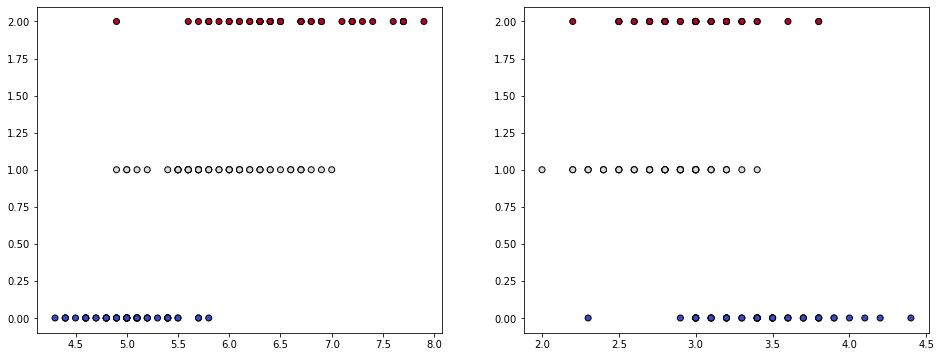

In [34]:
# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

ptbl = PrettyTable()
ptbl.field_names=['Model', 'Part', 'Accuracy', 'Time']

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    start = time.time()
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    #time.sleep(1)
    end = time.time()
    #print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    ptbl.add_row(['Logistic', part, logireg.score(x_v,y_v),end-start])
    #Creem el regresor logístic
    start = time.time()
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    #time.sleep(1)
    end = time.time()
    probs = svc.predict_proba(x_v)
    ptbl.add_row(['SVM', part, svc.score(x_v,y_v),end-start])
    #print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #IMPLEMENTACIÓ PRÒPIA
    #Decision Tree
    start = time.time()
    decision_tree_gini = DecisionTreeClassifier(criterion = 'gini')
    decision_tree_entropy =  DecisionTreeClassifier(criterion = 'entropy')
    #l'entrenem
    decision_tree_gini.fit(x_t,y_t)
    decision_tree_entropy.fit(x_t,y_t)
    #time.sleep(1)
    end = time.time()
    ptbl.add_row(['Decision Tree Gini', part, decision_tree_gini.score(x_v,y_v),end-start])
    ptbl.add_row(['Decision Tree Entropy', part, decision_tree_entropy.score(x_v,y_v),end-start])
    #print(f"Correct classification Decision Tree Gini {part} % of the data: {decision_tree_gini.score(x_v,y_v)}")
    #print(f"Correct classification Decision Tree Entropy {part} % of the data: {decision_tree_entropy.score(x_v,y_v)}")
    #Random Forest Classifier
    start = time.time()
    rf = RandomForestClassifier(n_estimators = 100)
    #l'entrenem
    rf.fit(x_t,y_t)
    #time.sleep(1)
    end = time.time()
    ptbl.add_row(['Random Forest', part, rf.score(x_v,y_v),end-start])
    #print(f"Correct classification RandomForest {part} % of the data: {rf.score(x_v,y_v)}")
    
    #AdaBoostClassifier
    start = time.time()
    abc = AdaBoostClassifier()
    #l'entrenem
    abc.fit(x_t,y_t)
    #time.sleep(1)
    end = time.time()
    ptbl.add_row(['Ada Boost Classifier', part, abc.score(x_v,y_v),end-start])
    #print(f"Correct classification AdaBoost {part} % of the data: {abc.score(x_v,y_v)}")
    #XGBoostClassifier
    start = time.time()
    xboost = xgb.XGBClassifier()
    #l'entrenem
    xboost.fit(x_t,y_t)
    #time.sleep(1)
    end = time.time()
    ptbl.add_row(['XGBoost', part, xboost.score(x_v,y_v),end-start])
    #print(f"Correct classification XGBoost {part} % of the data: {xboost.score(x_v,y_v)}")
    
print(ptbl)

Tal com podeu llegir a [l'API de sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html), en comptes de fer una corba per cada classe, podem considerar totes les classes en conjunt en una sola corba (1 si hem predit la classe correcta, 0 si no). Això es coneix com a `micro-averaging`. 

Així, veureu que la funció `f1_score` utilitza el paràmetre `macro` per calcular la precision-recall-f1 per clase, i després fer la mitja pr a totes les classes; i `micro` per utilitzar totes les prediccions (i errors de FN, FP) per a calcular una única precision-recall-f1 per a totes les classes juntes.

Si voleu calcular la corba Precision-Recall quan utilitzeu el K-fold, cal calcular les corbes per a cada fold i després [fer la mitja de tots els folds per obtenir la corba final](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py). En el cas del LOOCV no té sentit fer la mitja la corba PR perquè hauriem de fer servir totes les mostres com a $y$.


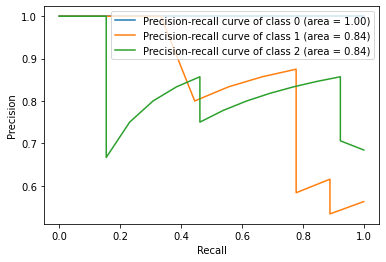

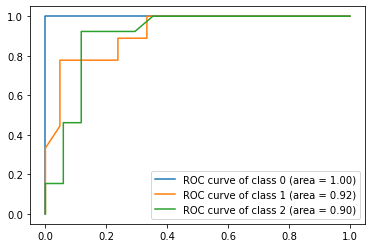

In [35]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [43]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel',
             'Logistic')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C),
              LogisticRegression(C=C, fit_intercept=True, penalty='l2', tol=0.001)
)
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(3, 2, figsize=(14,12))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


Podeu provar quin efecte té diferents valors de regularització per aquest petit exemple ( C=0.0001 to 1000..). També podeu veure com afecta els valors de degree i gamma. 

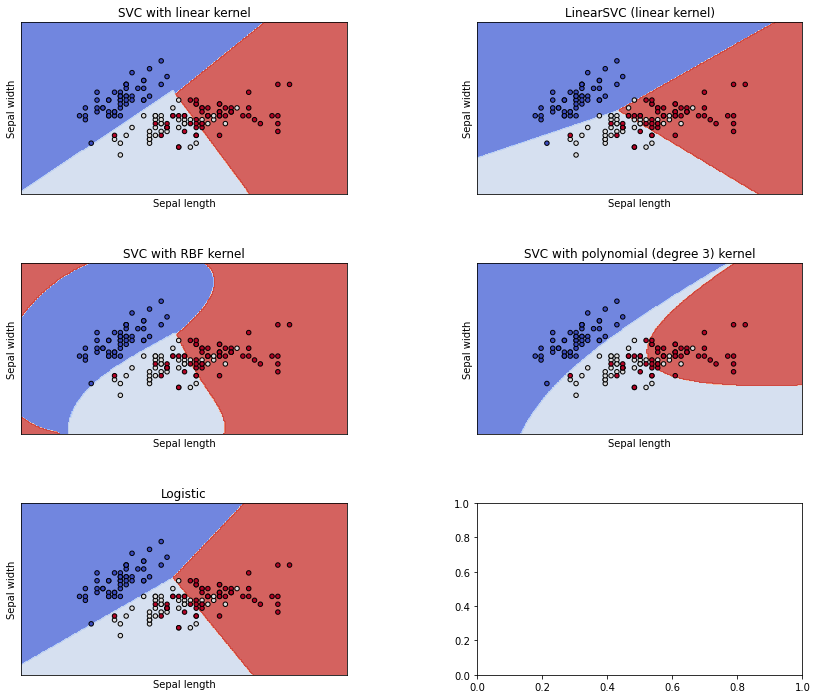

In [44]:
show_C_effect(C=1)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
0.0001


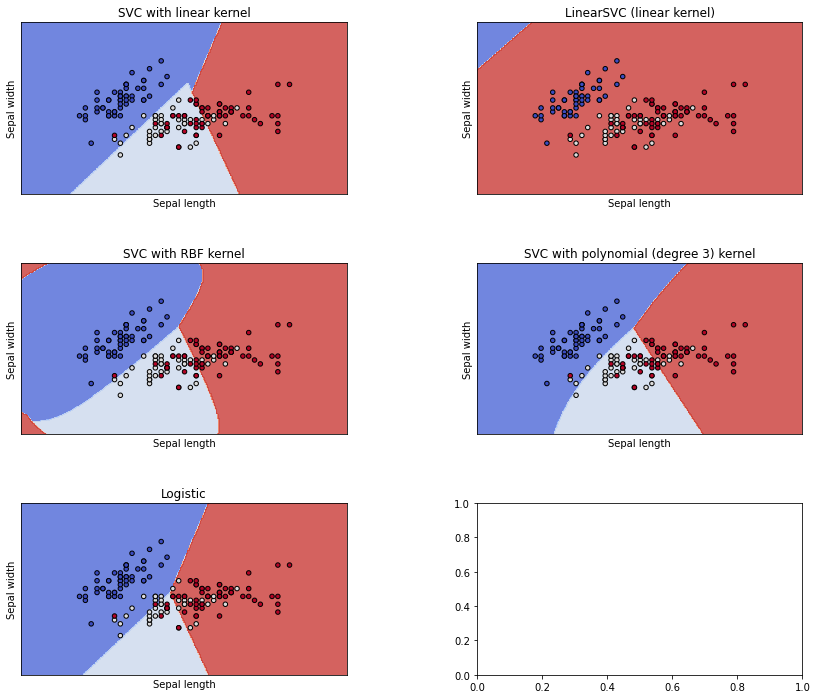

0.001


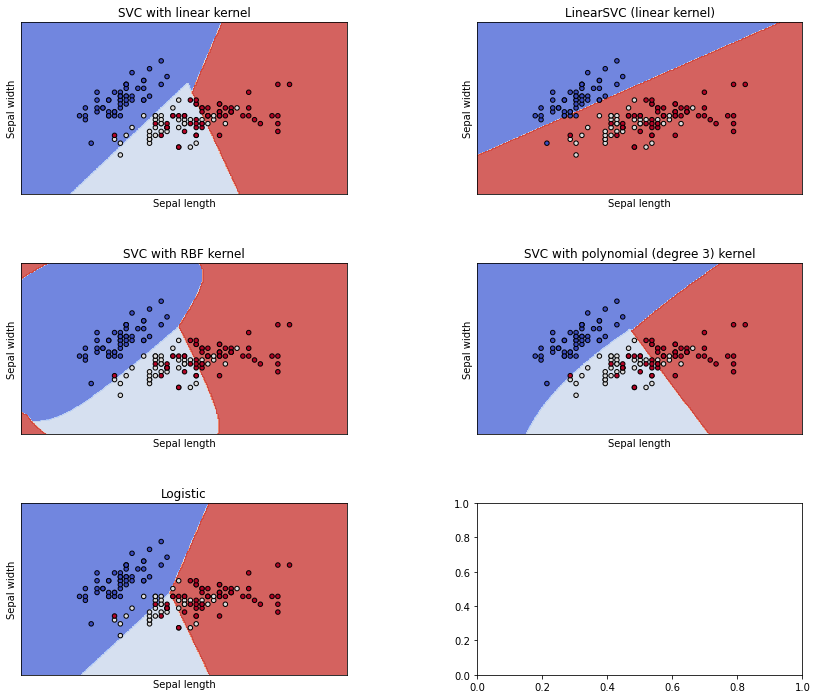

0.01


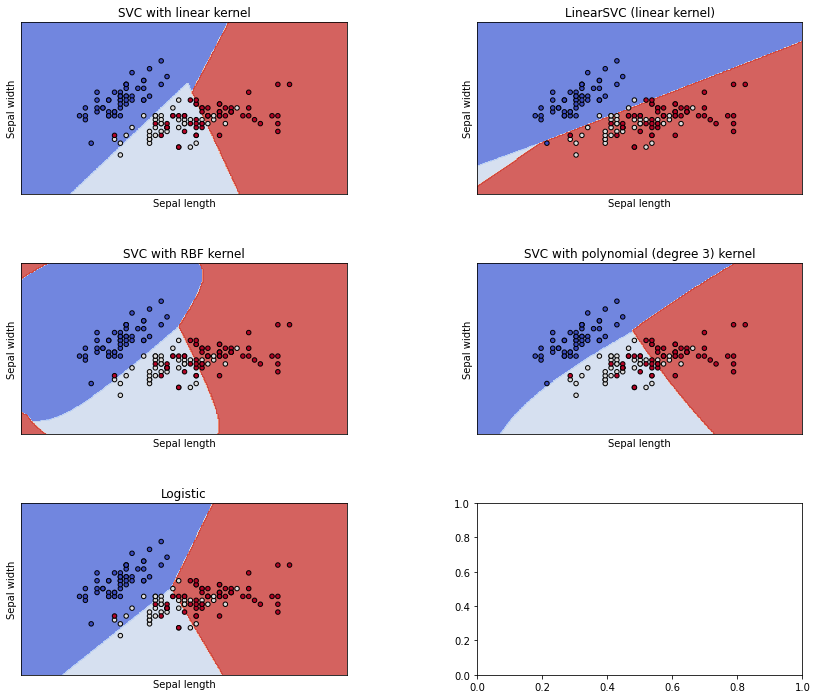

0.1


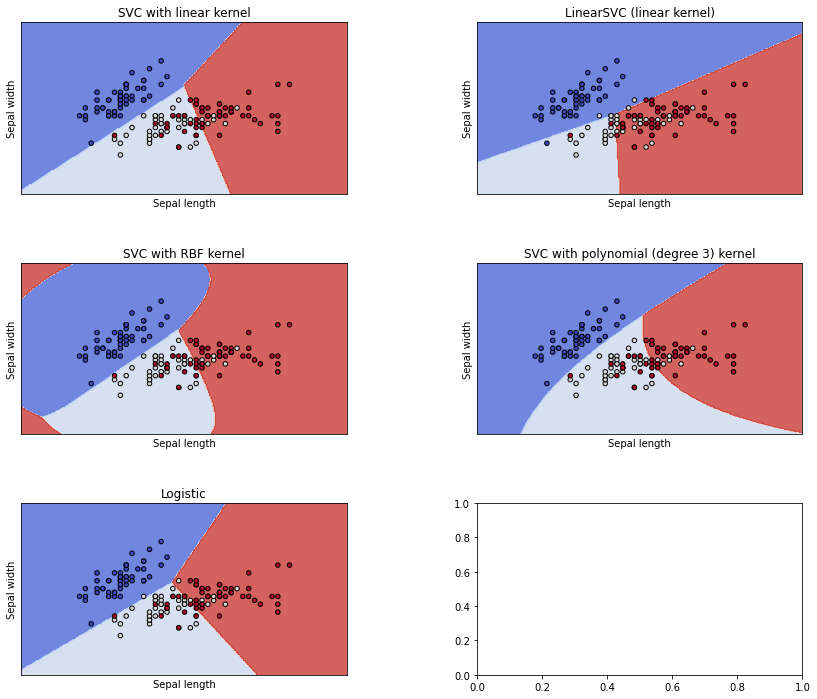

1


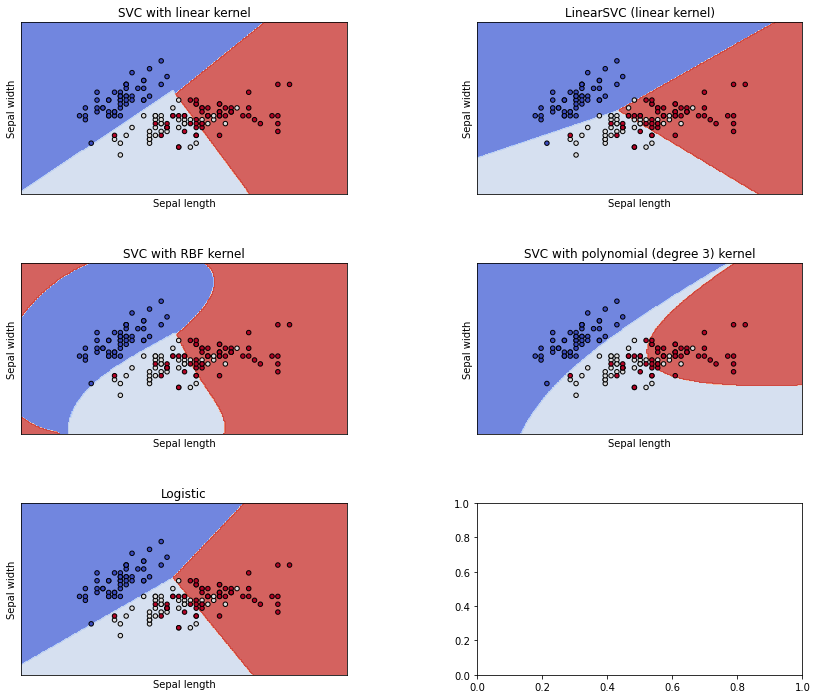

10


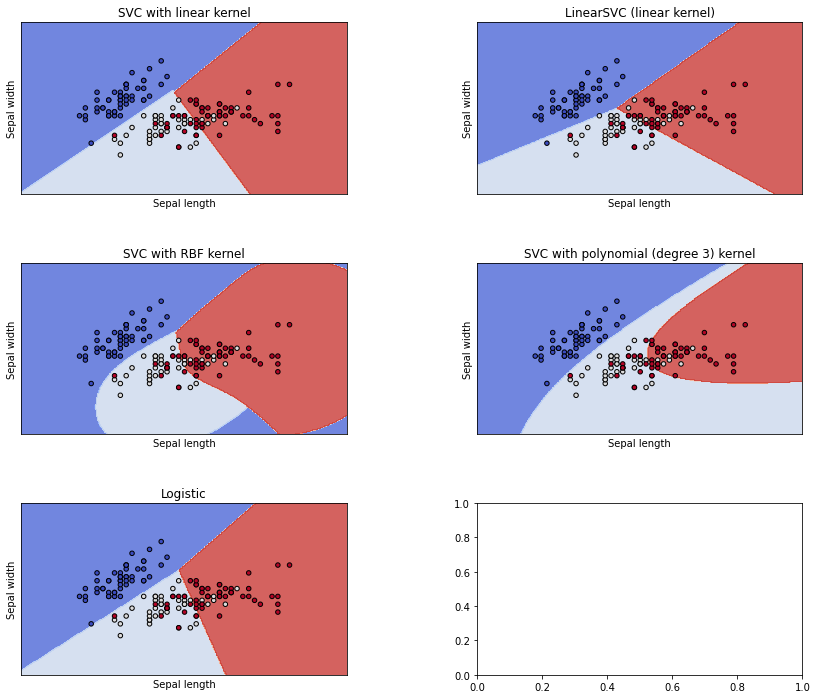

100


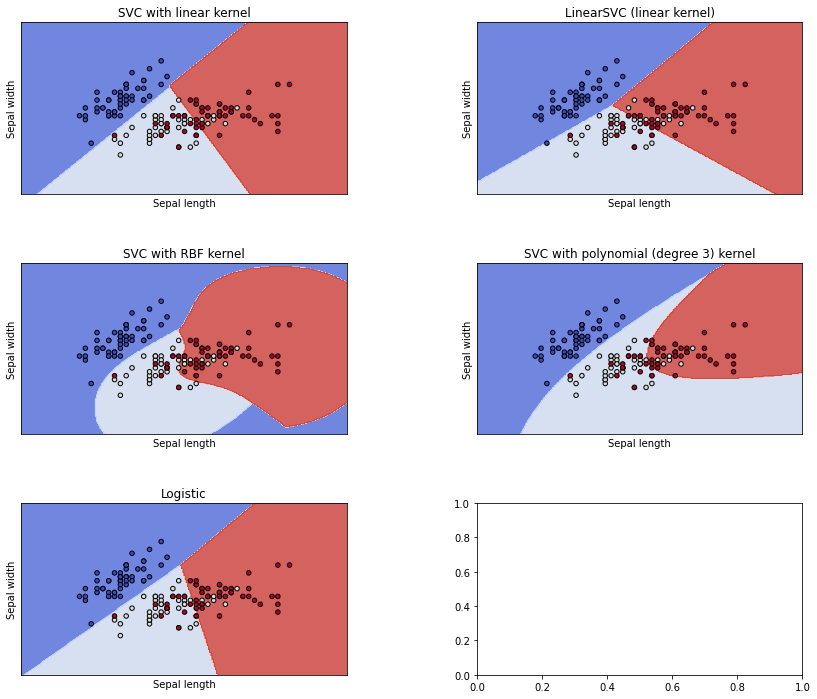

1000


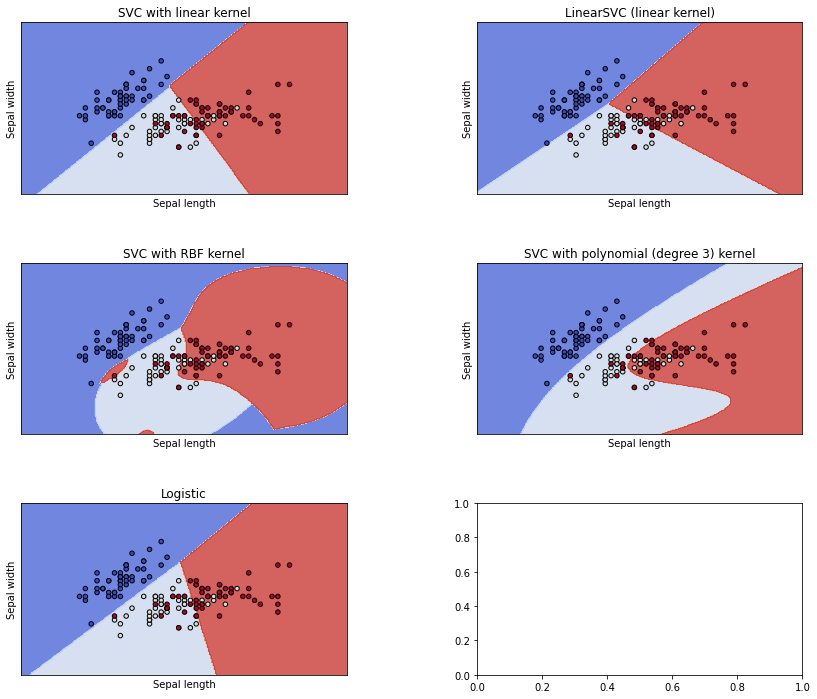

In [50]:
index = [10**x for x in range(-4,4)]
print(index)
fig, axes = plt.subplots(10,2,figsize=(10,20))
ax = axes.ravel()
idx=0
for i in index:
    print(i)
    ax[idx] = show_C_effect(C=i)
    idx+=1
fig.tight_layout()

# Apartat (A): Classificació Numèrica (6pts)

Per a aquest primer apartat, s'analitzarà els tipus d'atributs que es tenen i, si no està estipulat, **caldrà fixar quin és l'atribut objectiu a classificar de tots els que hi ha a la base de dades**.
Expliqueu a la memòria quin atribut heu fet servir, no hi ha una decisió única correcta, cal que doneu raons de per què heu triat l'atribut que hàgiu triat.

Treballarem varis aspectes de la classificació:

1. EDA (exploratory data analysis)
2. Preprocessing (normalitzation, outlier removal, feature selection..)
3. Model Selection
4. Crossvalidation
5. Metric Analysis
6. Hyperparameter Search


Durant els següents apartats, es recomana anar fent una taula amb el mètode, paràmetres i precisió obtinguda. D'aquesta manera serà més fàcil entendre i valorar què s'aconsegueix en cada metode. Exemple:

<img src="images/table_1.png" width="80%">

Les preguntes de cada apartat són orientatives. **NO** cal contestar-les totes, ni totes tindrán sentit per tots els datasets. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat. Tot i no ser obligatories, si que són molt recomenades d'intentar respondre.

### 1. EDA (exploratory data analysis)

Igual com a la pràctica anterior, exploreu i visualitzeu com és la base de dades que teniu assignada.

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import pandas as pd
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('train.csv')
data = dataset.values



print("Dimensionalitat de la BBDD:", dataset.shape)



Dimensionalitat de la BBDD: (891, 12)


In [53]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [54]:
x = data[:, :11]
y = data[:, 1]
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (891, 11)
Dimensionalitat de l'atribut Y (891,)


Escollim com atribut objectiu la columna $survived$ ja que considerem que és la més adient a mirar ja que ens interessa saber qui va sobreviure i mirar d'extreure unes conclusions de perquè ho va fer i no va sobreviure un altre.

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
dataset = dataset.drop(['Name','Ticket','Cabin'],axis=1)
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset = dataset.dropna()
#dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)


In [59]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000,1,0,7.250,S
1,2,1,1,female,38.000,1,0,71.283,C
2,3,1,3,female,26.000,0,0,7.925,S
3,4,1,1,female,35.000,1,0,53.100,S
4,5,0,3,male,35.000,0,0,8.050,S


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
label_encoder_sex = LabelEncoder()
dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])
dataset['Sex'] = label_encoder_sex.fit_transform(dataset['Sex'])
dict(enumerate(label_encoder.classes_)) #S = 2 ; C = 0; Q = 1
dict(enumerate(label_encoder_sex.classes_)) #male = 1 ; female = 0
x = dataset.values[:,dataset.columns != 'Survived']
y = dataset.values[:,1]
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000,1,0,7.250,2
1,2,1,1,0,38.000,1,0,71.283,0
2,3,1,3,0,26.000,0,0,7.925,2
3,4,1,1,0,35.000,1,0,53.100,2
4,5,0,3,1,35.000,0,0,8.050,2


In [62]:
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,446.000,0.382,2.312,0.649,29.315,0.524,0.382,32.097,1.535
std,256.998,0.486,0.835,0.478,12.985,1.104,0.807,49.698,0.792
min,1.000,0.000,1.000,0.000,0.420,0.000,0.000,0.000,0.000
25%,224.000,0.000,2.000,0.000,22.000,0.000,0.000,7.896,1.000
50%,446.000,0.000,3.000,1.000,28.000,0.000,0.000,14.454,2.000
75%,668.000,1.000,3.000,1.000,35.000,1.000,0.000,31.000,2.000
max,891.000,1.000,3.000,1.000,80.000,8.000,6.000,512.329,2.000


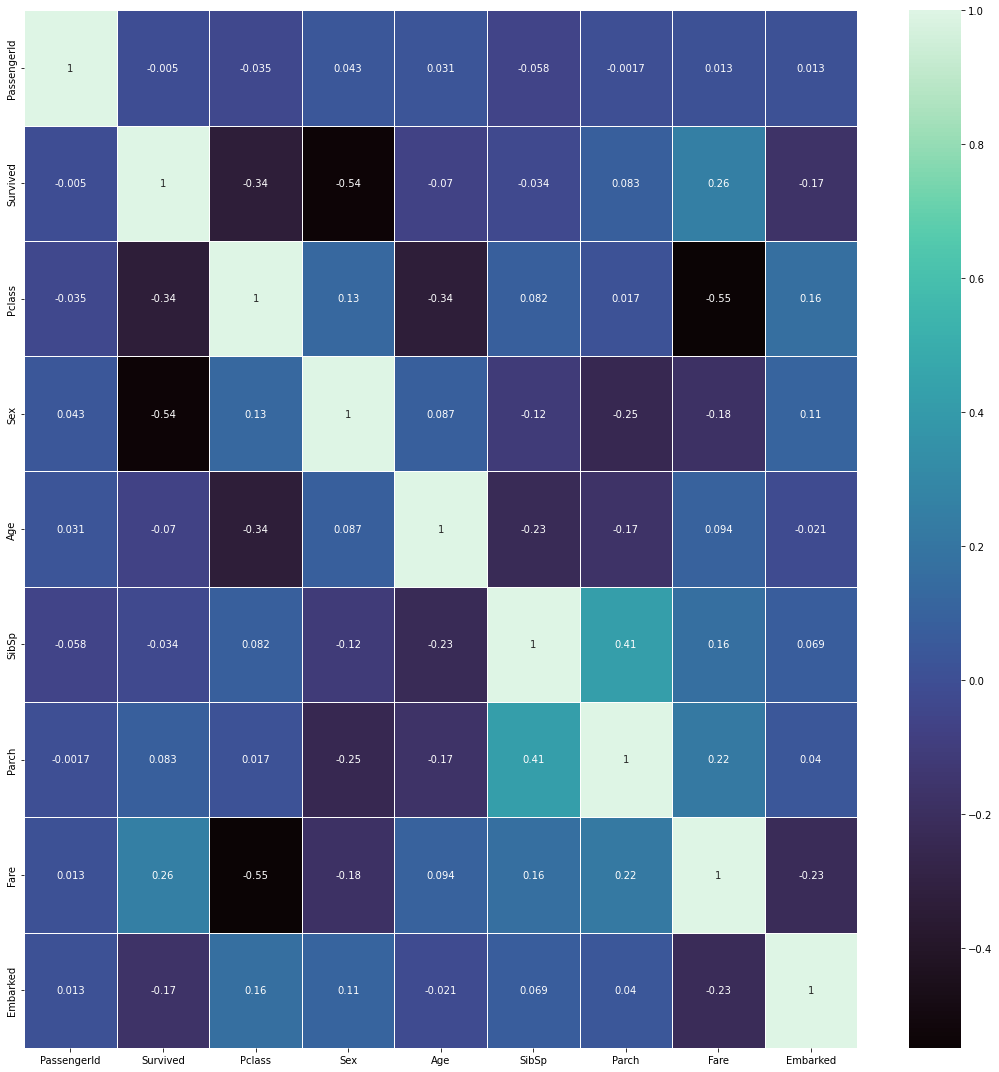

In [63]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(correlacio, annot=True, linewidths=.5, ax=ax, cmap="mako")

fig.tight_layout()

In [66]:
correlation_threshold = 0.15
attributes  = list(filter(lambda x: abs(float(dataset.corr()['Survived'].to_frame().T[x])) > correlation_threshold, dataset.columns))
attributes.remove('Survived')
corrTbl = PrettyTable()
corrTbl.field_names = ['Atribut']
for i in range(len(attributes)): 
    corrTbl.add_row([attributes[i]])
print(corrTbl)


+----------+
| Atribut  |
+----------+
|  Pclass  |
|   Sex    |
|   Fare   |
| Embarked |
+----------+


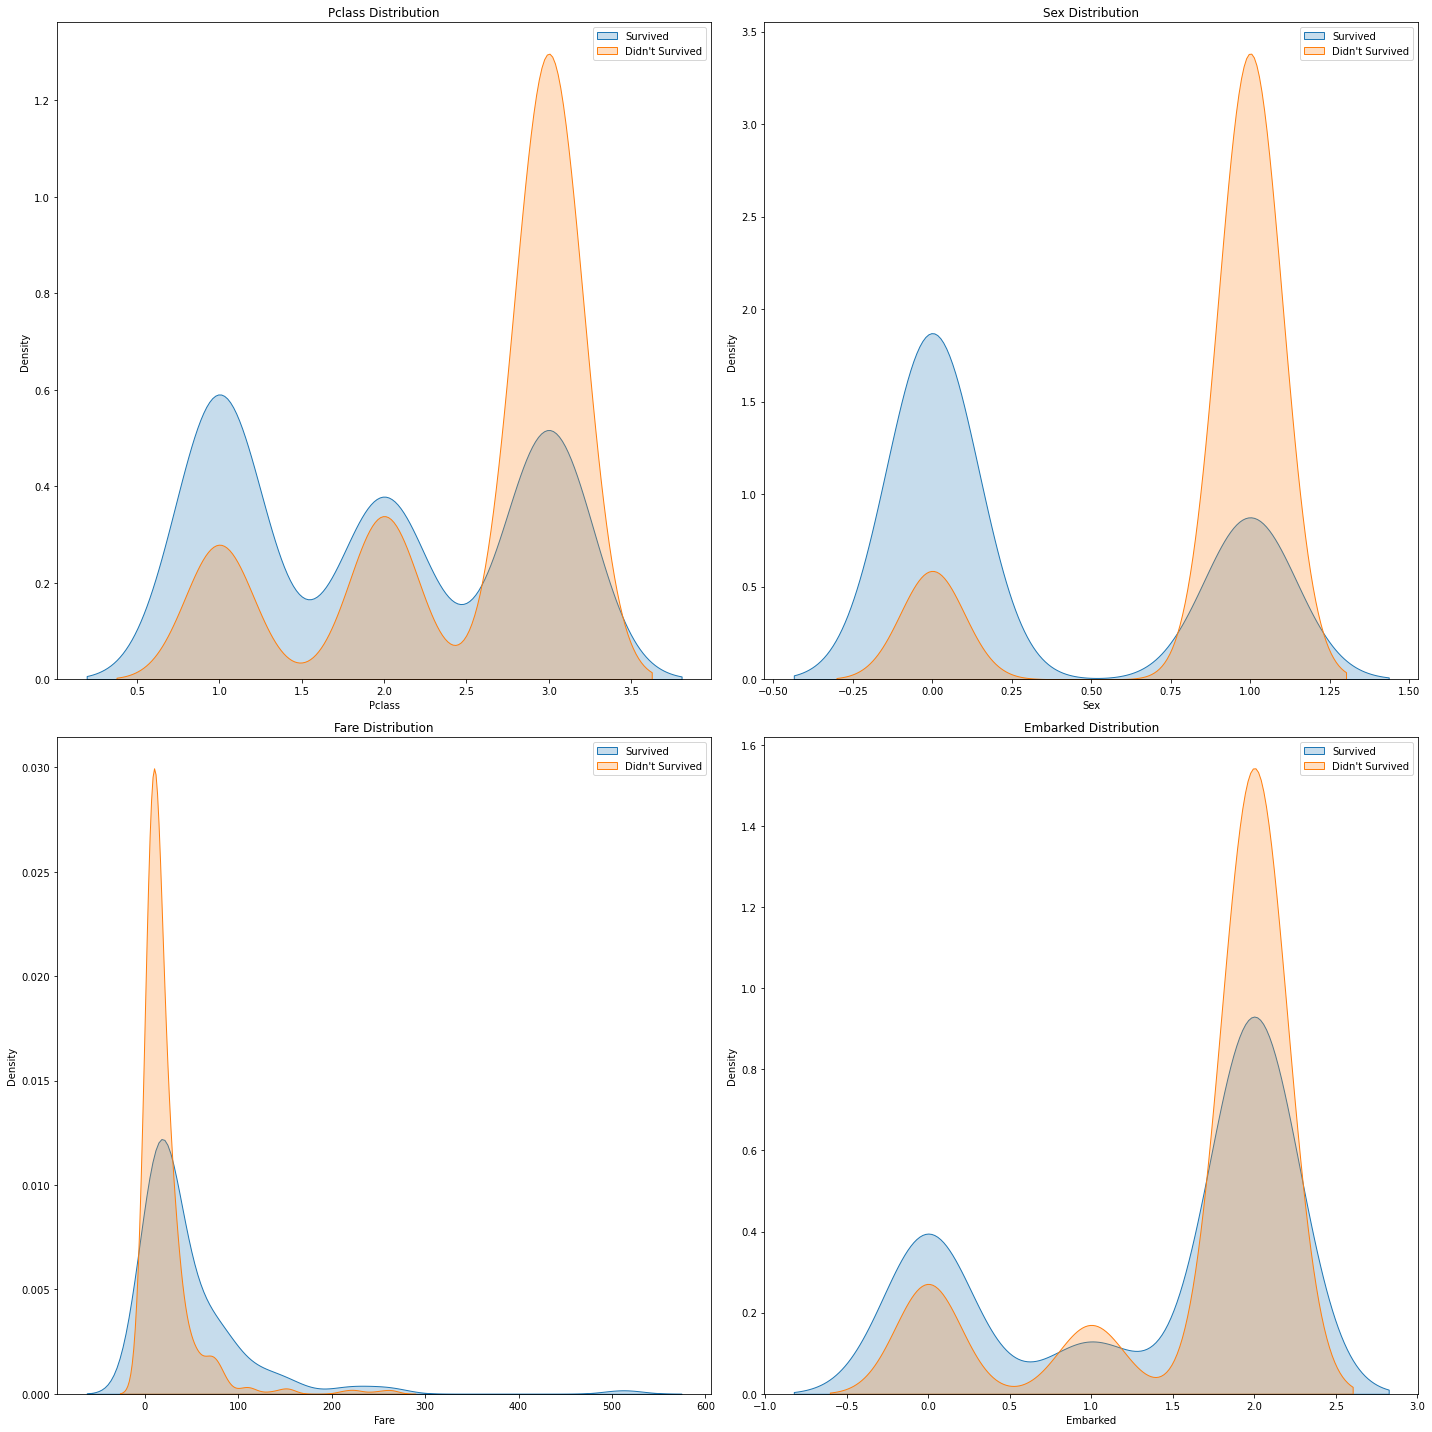

In [20]:
survived = dataset[dataset['Survived']==1]
no_survived = dataset[dataset['Survived']==0]
fig, axes = plt.subplots(2,2, figsize=(20,20))
ax = axes.ravel()

for i in range(len(attributes)): 
    ax[i].set_title(f'{attributes[i]} Distribution')
    if (i==0):
        sns.distplot(survived[attributes[i]], hist=False, kde_kws={'shade':True},label="Survived",ax=axes[0,0])
        sns.distplot(no_survived[attributes[i]], hist=False, kde_kws={'shade': True}, label= "Didn't survived",ax=axes[0,0])
    elif(i==1):
        sns.distplot(survived[attributes[i]], hist=False, kde_kws={'shade':True},label="Survived",ax=axes[0,1])
        sns.distplot(no_survived[attributes[i]], hist=False, kde_kws={'shade': True}, label= "Didn't survived",ax=axes[0,1])
    elif(i==2):
        sns.distplot(survived[attributes[i]], hist=False, kde_kws={'shade':True},label="Survived",ax=axes[1,0])
        sns.distplot(no_survived[attributes[i]], hist=False, kde_kws={'shade': True}, label= "Didn't survived",ax=axes[1,0])
    elif(i==3):
        sns.distplot(survived[attributes[i]], hist=False, kde_kws={'shade':True},label="Survived",ax=axes[1,1])
        sns.distplot(no_survived[attributes[i]], hist=False, kde_kws={'shade': True}, label= "Didn't survived",ax=axes[1,1])
    ax[i].legend(["Survived", "Didn't Survived"], loc="best")
fig.tight_layout()

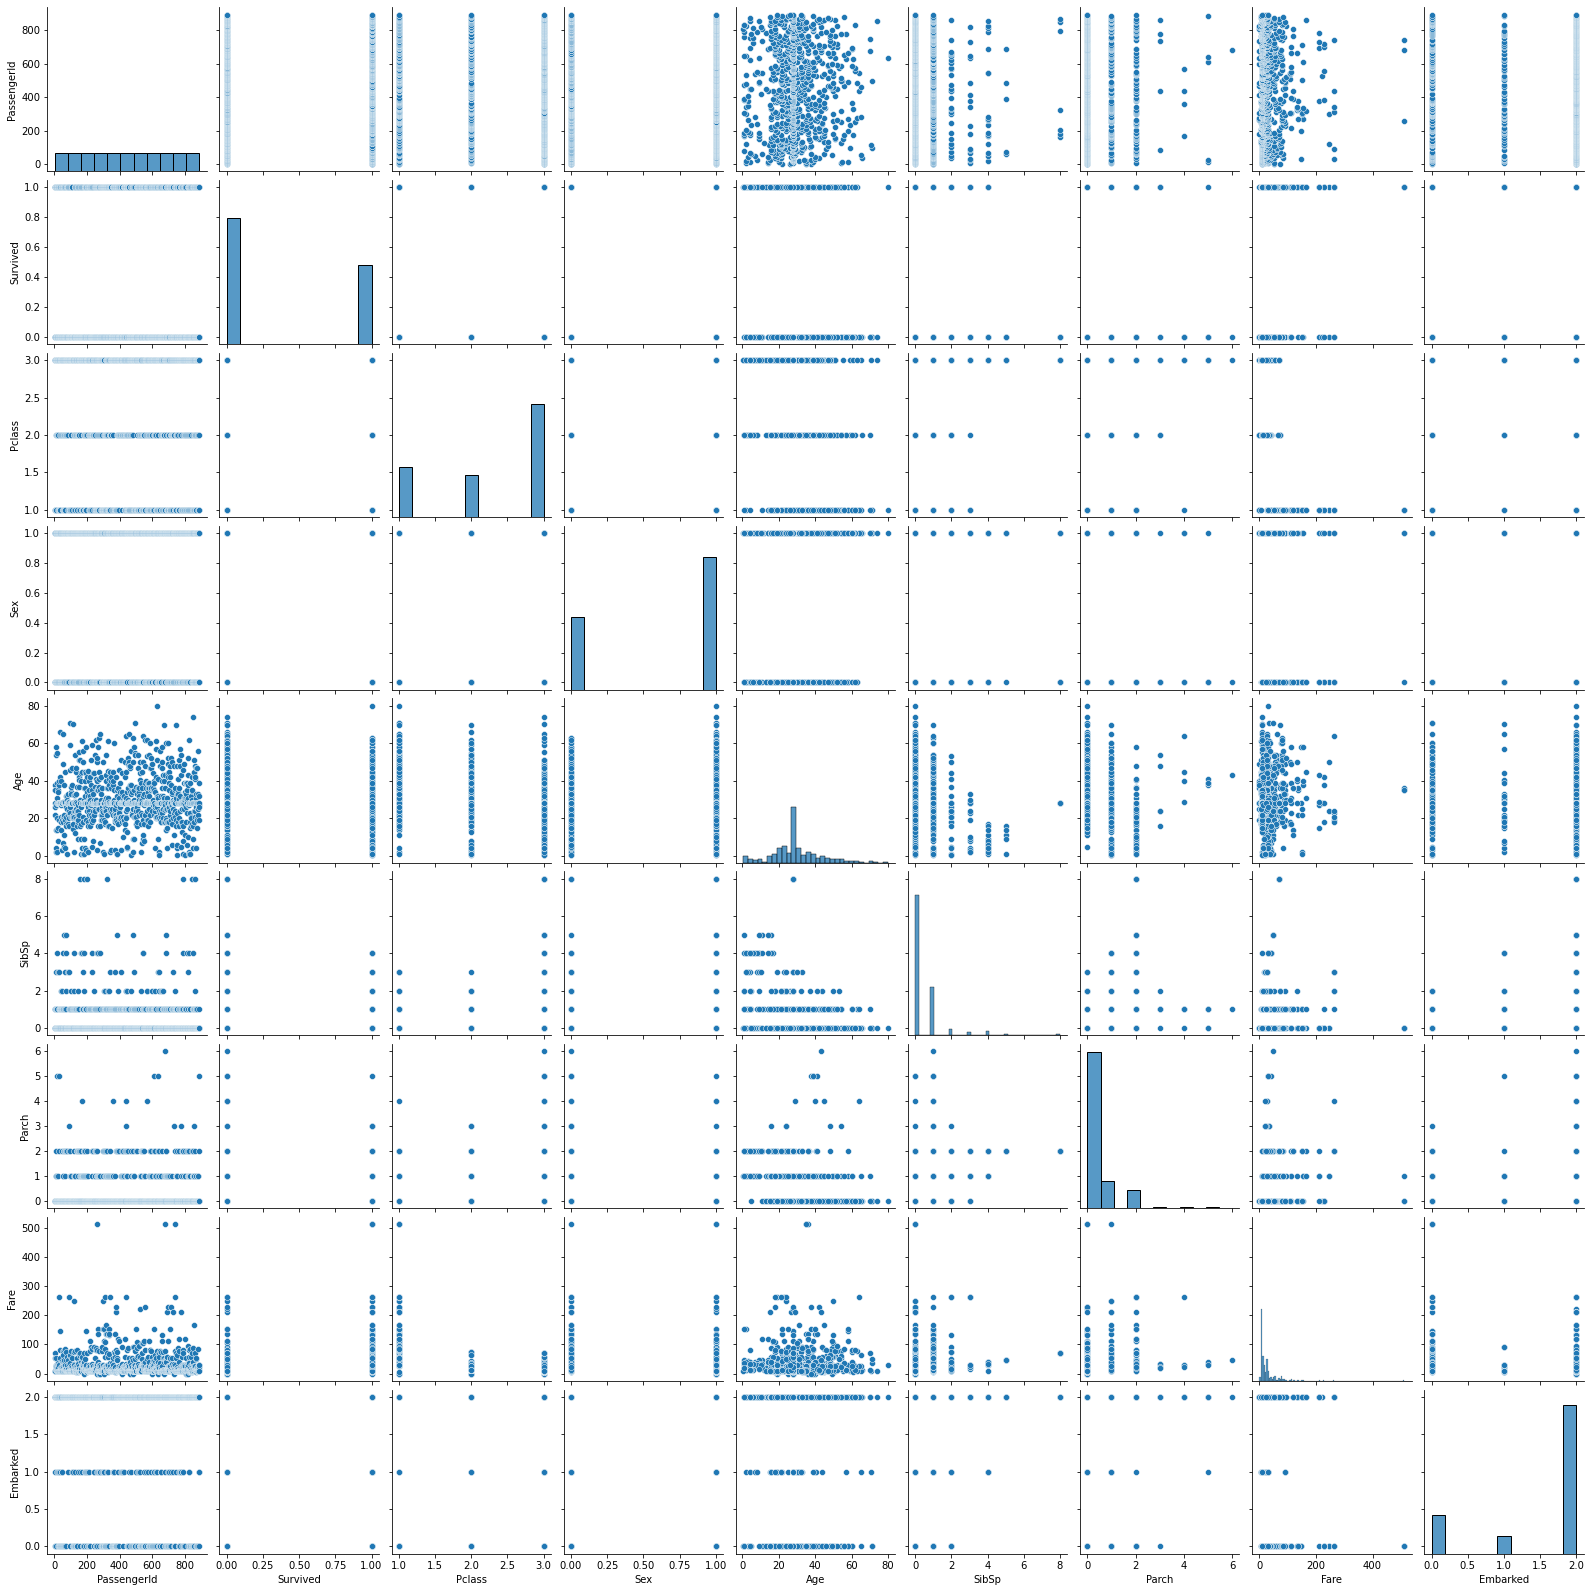

In [21]:
relacio = sns.pairplot(dataset)

### 2. Preprocessing (normalitzation, outlier removal, feature selection..)
Un cop vistes les dades de les que es disposa, per tal de tenir un aprenentatge més eficient, es recomana normalitzar les dades i treure outliers. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics..

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació? Els NaNs a pandas? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit? (`OrdinalEncoder`, `OneHotEncoder`, d'altres?)
* Caldria aplicar `sklearn.decomposition.PCA`? Quins beneficis o inconvenients trobarieu?
* Es poden aplicar `PolynomialFeatures` per millorar la classificació? En quins casos té sentit fer-ho?

In [67]:
test_dataset = load_dataset('test.csv')
test_dataset = test_dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_dataset['Age'].fillna(test_dataset['Age'].median(), inplace=True)
test_dataset['Fare'].fillna(test_dataset['Fare'].mean(), inplace=True)
test_dataset=test_dataset.dropna()
label_encoder = LabelEncoder()
label_encoder_sex = LabelEncoder()
test_dataset['Embarked'] = label_encoder.fit_transform(test_dataset['Embarked'])
test_dataset['Sex'] = label_encoder_sex.fit_transform(test_dataset['Sex'])
test_dataset.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.500,0,0,7.829,1
1,893,3,0,47.000,1,0,7.000,2
2,894,2,1,62.000,0,0,9.688,1
3,895,3,1,27.000,0,0,8.662,2
4,896,3,0,22.000,1,1,12.287,2


In [68]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 26.1 KB


In [24]:
#APLIQUEM MODELS
#Dividim les dades

y_train = dataset['Survived']
X_train  = dataset.drop(['PassengerId', 'Survived'],axis=1)

X_test = test_dataset.drop(["PassengerId"],axis=1)


In [90]:
from sklearn.neural_network import MLPClassifier
models = [LogisticRegression(), DecisionTreeClassifier(max_depth=7), RandomForestClassifier(n_estimators=50), 
          AdaBoostClassifier(), xgb.XGBClassifier(), MLPClassifier()]
model_names = ["Logistic", "Decision Tree", "Random Forest", "Ada Boost", "XGBoost", "Neural Network"]
idx= 0
tbl = PrettyTable()
tbl.field_names = ['Model', 'Accuracy', 'Temps']
for m in models: 
    start = time.time()
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    end = time.time()
    tbl.add_row([model_names[idx], score, end-start])
    #print(f"Utilitzant el model {model_names[idx]} obtenim una accuracy de: {m.score(X_train,y_train)}")
    idx+=1

print(tbl)
    

[19:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
+----------------+--------------------+----------------------+
|     Model      |      Accuracy      |        Temps         |
+----------------+--------------------+----------------------+
|    Logistic    | 0.8002244668911336 | 0.03799867630004883  |
| Decision Tree  | 0.8787878787878788 | 0.005018949508666992 |
| Random Forest  | 0.9797979797979798 | 0.12830114364624023  |
|   Ada Boost    | 0.8338945005611672 |  0.1089479923248291  |
|    XGBoost     | 0.9629629629629629 | 0.17099928855895996  |
| Neural Network | 0.8204264870931538 |  0.6700007915496826  |
+----------------+--------------------+----------------------+


In [85]:
#Models diversos de SVM
from sklearn import svm
svm_models= [svm.SVC(kernel='linear', C=10),
              svm.LinearSVC(C=10, max_iter=1000000),
              svm.SVC(kernel='rbf',  C=10),
              svm.SVC(kernel='poly',degree=4, C=10),
              svm.SVC(kernel='sigmoid', C=10)]
svm_kernels = ["Linear","SVC Linear", "RBF", "Polyniomical", "Sigmoid"]
idx= 0
svmtbl = PrettyTable()
svmtbl.field_names = ['Model', 'Accuracy', 'Temps']
for svm in svm_models:
    start =  time.time()
    svm.fit(X_train, y_train)
    score = svm.score(X_train,y_train)
    end = time.time()
    svmtbl.add_row([svm_kernels[idx], score, end-start])
    #print(f"Utilitzant el kernel {svm_kernels[idx]} obtenim una accuracy de: {svm.score(X_train,y_train)}")
    idx+=1

In [86]:
print(svmtbl)

+--------------+--------------------+---------------------+
|    Model     |      Accuracy      |        Temps        |
+--------------+--------------------+---------------------+
|    Linear    | 0.7867564534231201 |  40.72702097892761  |
|  SVC Linear  | 0.8024691358024691 |  47.30052304267883  |
|     RBF      | 0.7328843995510662 | 0.14799952507019043 |
| Polyniomical | 0.6801346801346801 |  0.7819998264312744 |
|   Sigmoid    | 0.5768799102132436 | 0.05800032615661621 |
+--------------+--------------------+---------------------+


### 3. Model Selection
La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour, i el perceptró...
En aquesta secció heu de valorar quina o quines tècniques voleu fer servir, aixi com també explicar el per què les heu seleccionat. Recomanem, que per entendre millor la teoria, s'ha de provar com a mínim un model de SVM.

**Preguntes:**
* Quins models heu considerat?
* Considereu les SVM amb els diferents kernels implementats.
* Quin creieu que serà el més precís?
* Quin serà el més ràpid?
* Seria una bona idea fer un `ensemble`? Quins inconvenients creieu que pot haver-hi? [Documentació](https://scikit-learn.org/stable/modules/ensemble.html)

In [89]:
idx=0
for m in models:
    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    test_dataset['Survived'] = y_pred
    subm = test_dataset.loc[:,['PassengerId', 'Survived']]
    subm.to_csv(f'submission{idx}.csv', index=False)
    idx+=1


[19:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
for i in range(1,10):
    if i!=5:
        model =  DecisionTreeClassifier(max_depth=i)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        test_dataset['Survived'] = y_pred
        subm = test_dataset.loc[:,['PassengerId', 'Survived']]
        subm.to_csv(f'submission{i}.csv', index=False)
        

### 4. Crossvalidation
Un cop seleccionats quins models es volen testejar sobre les dades, s'han de poder evaluar correctament. Per aquests motius, haurem d'aprendre a cros-validar els resultats.
Reviseu la [documentació](https://scikit-learn.org/stable/modules/cross_validation.html) i escolliu quin tipus de crossvalidació pot ser l'adecuada pel vostre problema.

**Preguntes:**
* Per què és important cross-validar els resultats?
* Separa la base de dades en el conjunt de train-test. Com de fiables serán els resultats obtinguts? En quins casos serà més fiable, si tenim moltes dades d'entrenament o poques?
* Quin tipus de K-fold heu escollit? Quants conjunts heu seleccionat (quina k)? Com afecta els diferents valors de k?
* Es viable o convenient aplicar `LeaveOneOut`?


### 5. Metric Analysis
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`.
* Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

### 6. Hyperparameter Search
El motiu d'aplicar crossvalidació durant l'entrenament és que ens permet conèixer quin serà el resultat esperat del nostre model un cop en producció, és a dir, com es comportarà sobre dades mai vistes abans.
A més, també ens permet optimitzar quins són els hiperparametres dels models que millor funcionaran en el futur test.

**Preguntes:**
* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html)
* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels dos métodes creieu que obtindrà millor resultat final?
* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?
* Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (estimeu el temps que trigarà a fer 1 training, i aixi trobeu el número de intents que podeu fer en cada cas.)

